[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387
Model Performance Metrics:
              Model  Accuracy  Precision   Recall  F1 Score  AUC-ROC  Training Time
Logistic Regression  0.830233   0.789855 0.712418  0.749141 0.894316       0.035132
                SVM  0.832558   0.800000 0.705882  0.750000 0.897029       1.119733
      Random Forest  0.941860   0.963768 0.869281  0.914089 0.946344       1.119836
        Extra Trees  0.846512   0.878261 0.660131  0.753731 0.925745       0.370266
                KNN  0.718605   0.642857 0.470588  0.543396 0.7

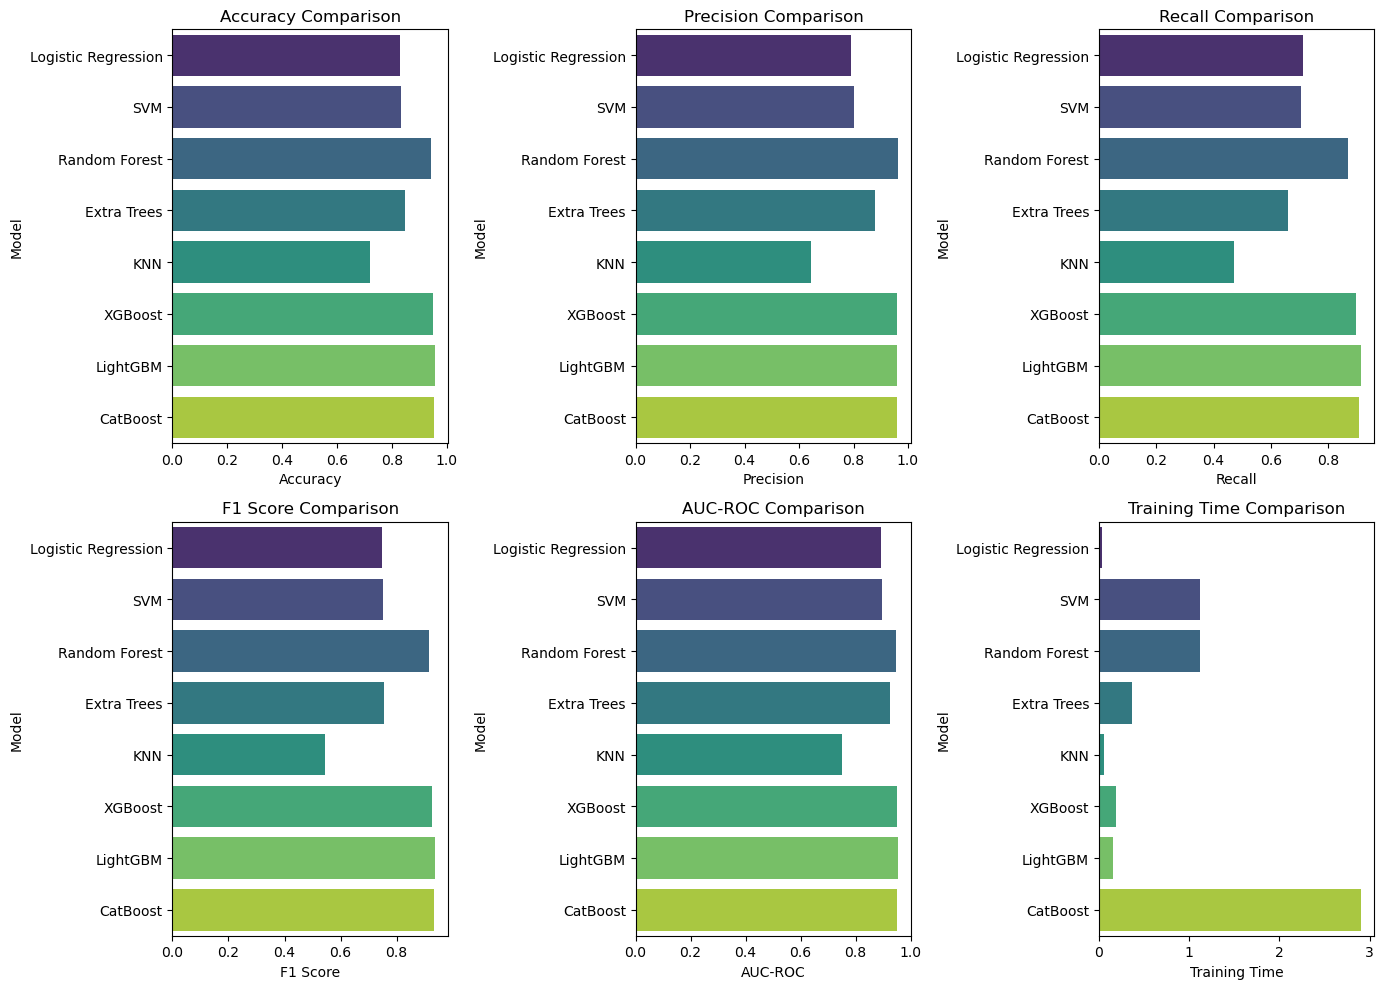

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387


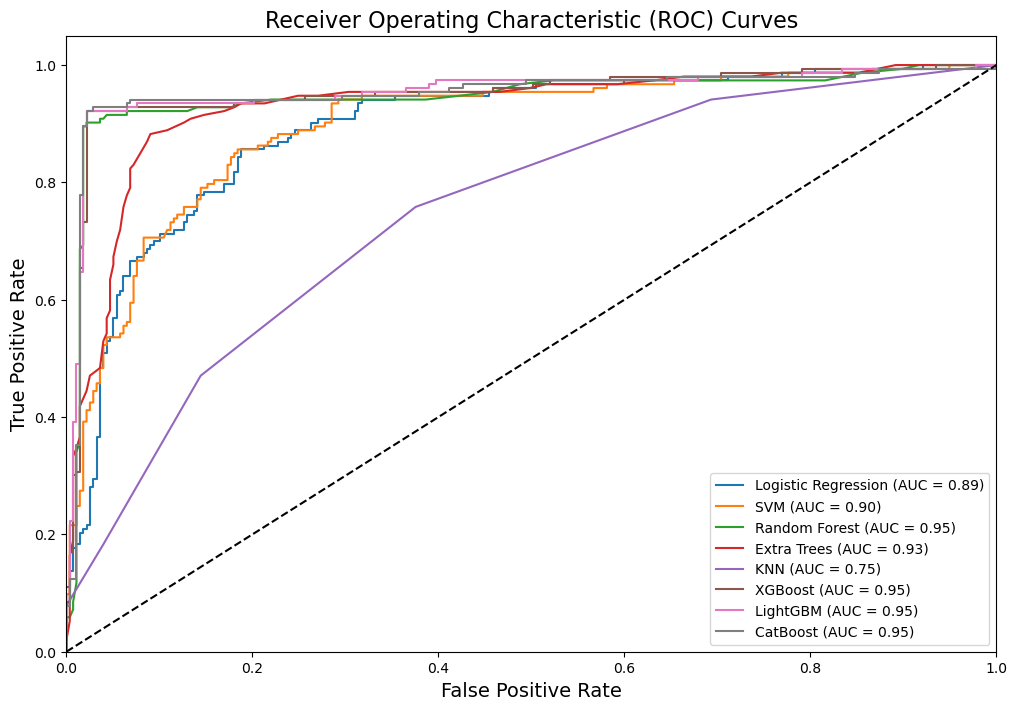

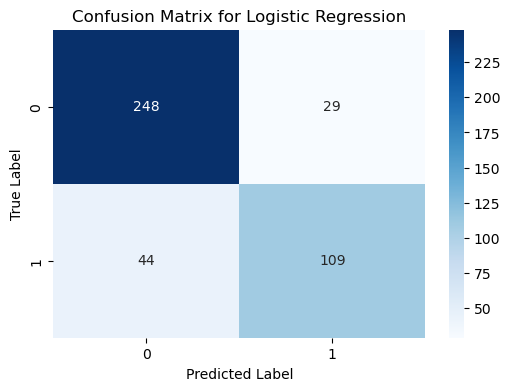

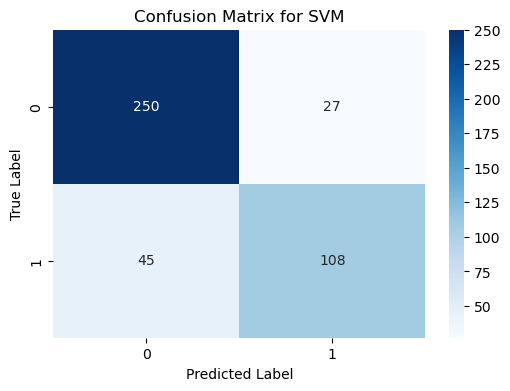

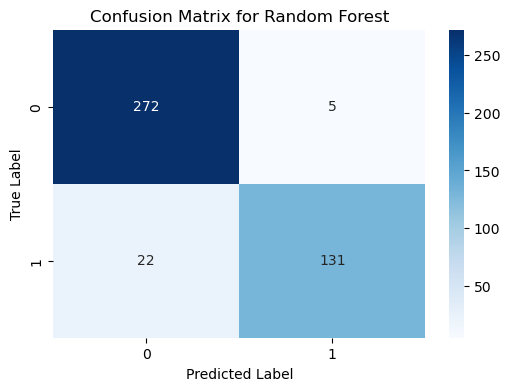

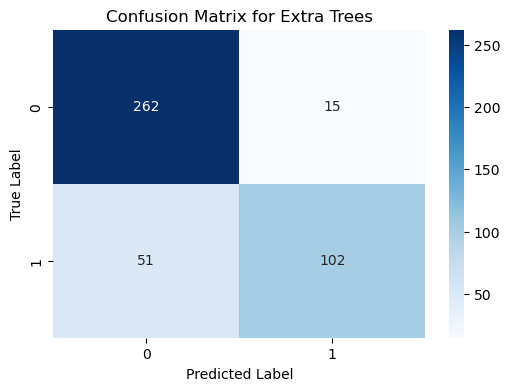

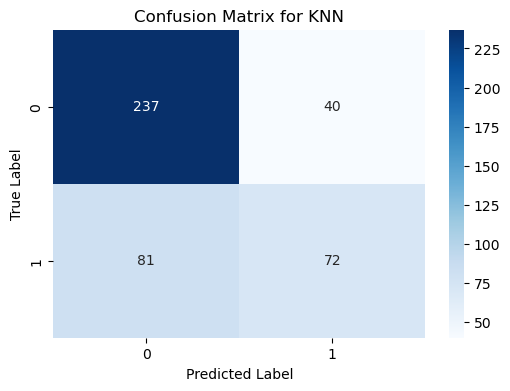

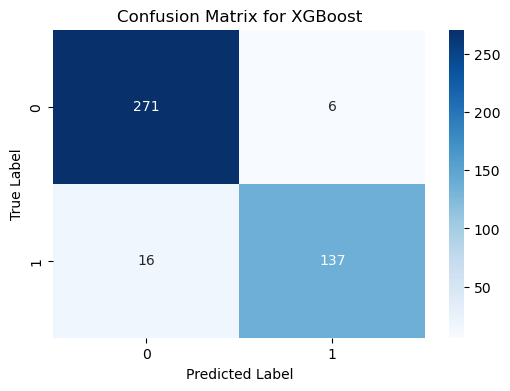

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387


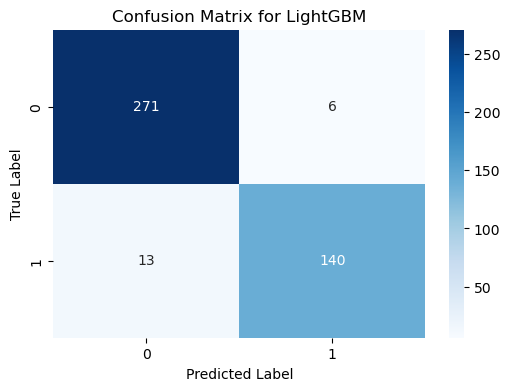

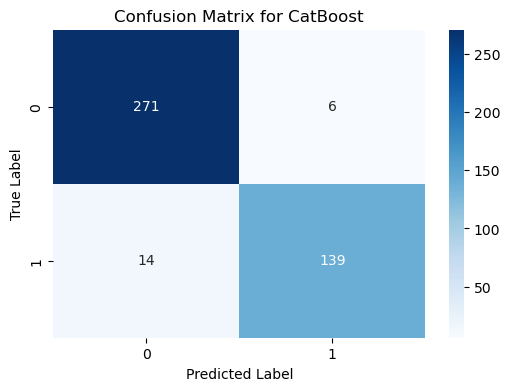

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
[LightGBM] [Info] Nu

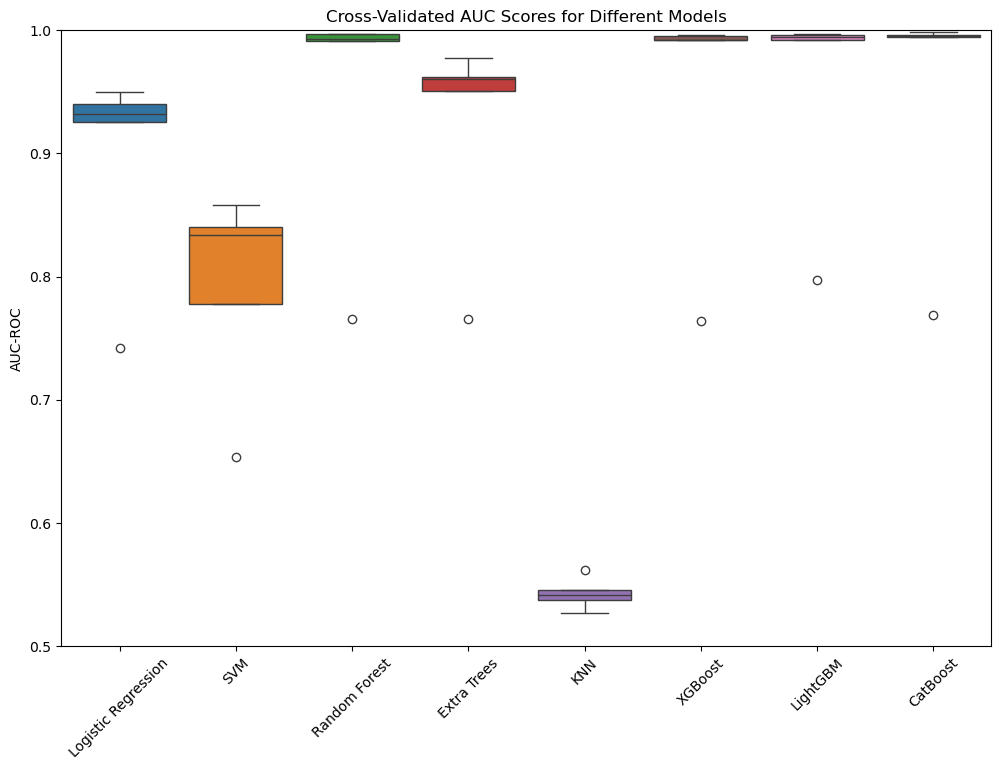


Cross-Validation Summary:
              Model  Mean AUC  Std AUC
Logistic Regression  0.898026 0.087423
                SVM  0.792755 0.083600
      Random Forest  0.948851 0.102566
        Extra Trees  0.923267 0.088826
                KNN  0.542681 0.012771
            XGBoost  0.947875 0.102908
           LightGBM  0.955525 0.088343
           CatBoost  0.950643 0.101591


In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from scipy import stats

# Load data
data = pd.read_csv('alzheimers_disease_data.csv')

# Drop unnecessary column
data = data.drop(columns=['DoctorInCharge'])  # Adjust based on your data

# Prepare your data
X = data.drop(columns=['Diagnosis', 'PatientID'])
y = data['Diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, X_test, y_train, y_test, scaled=False):
    start_time = time.time()
    
    if scaled:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    training_time = time.time() - start_time

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
        'Training Time': training_time
    }

# Initialize models with adjusted parameters for Logistic Regression
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear'),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
}

# Collect results
results_list = []

for name, model in models.items():
    scaled = name in ['SVM', 'KNN', 'Logistic Regression']
    metrics = train_evaluate_model(model, X_train, X_test, y_train, y_test, scaled=scaled)
    
    # Append results to the list
    results_list.append({
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score'],
        'AUC-ROC': metrics['AUC-ROC'],
        'Training Time': metrics['Training Time']
    })

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

print("Model Performance Metrics:")
print(results.to_string(index=False))

# Plot results
plt.figure(figsize=(14, 10))

# Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Accuracy', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('Accuracy Comparison')

# Precision
plt.subplot(2, 3, 2)
sns.barplot(x='Precision', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('Precision Comparison')

# Recall
plt.subplot(2, 3, 3)
sns.barplot(x='Recall', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('Recall Comparison')

# F1 Score
plt.subplot(2, 3, 4)
sns.barplot(x='F1 Score', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('F1 Score Comparison')

# AUC-ROC
plt.subplot(2, 3, 5)
sns.barplot(x='AUC-ROC', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('AUC-ROC Comparison')

# Training Time
plt.subplot(2, 3, 6)
sns.barplot(x='Training Time', y='Model', data=results, hue='Model', palette='viridis', legend=False)
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(12, 8))

# Define scaled datasets for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrices
for name, model in models.items():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Perform cross-validation
cv_results = {name: [] for name in models.keys()}
cv_folds = 5

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='roc_auc')
    cv_results[name] = scores

# Convert to DataFrame for easier handling
cv_results_df = pd.DataFrame(cv_results)

print("Cross-Validated AUC Scores:")
print(cv_results_df.to_string(index=False))

# Perform paired t-tests
baseline = 'Logistic Regression'
print("\nPaired t-tests:")
for name in models.keys():
    if name != baseline:
        t_stat, p_val = stats.ttest_rel(cv_results_df[baseline], cv_results_df[name])
        print(f"Paired t-test between {baseline} and {name}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

# Plot cross-validated AUC scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=cv_results_df)
plt.title('Cross-Validated AUC Scores for Different Models')
plt.ylabel('AUC-ROC')
plt.xticks(rotation=45)
plt.ylim(0.5, 1)
plt.show()

# Calculate mean and standard deviation of AUC scores
cv_summary = cv_results_df.describe().loc[['mean', 'std']].transpose().reset_index()
cv_summary.columns = ['Model', 'Mean AUC', 'Std AUC']
print("\nCross-Validation Summary:")
print(cv_summary.to_string(index=False))
